## Importando Bibliotecas

In [1]:
# Bibliotecas para tratar dados
import pandas as pd

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos do Seaborn (opcional, apenas para melhorar a estética)
sns.set(style='whitegrid')

# Configurar para não exibir warnings
import warnings

warnings.filterwarnings("ignore")

# Configurando para exibir até 15 linhas de um DataFrame do Pandas
pd.set_option("display.max_rows", 15)

# Configurando para exibir todas as colunas de um DataFrame do Pandas
pd.set_option("display.max_columns", None)

# Configurando a opção para evitar notação científica
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))




## Carregando Dataset de Treino

In [2]:
train_data = pd.read_csv('datasets/cars_train.csv')
train_data.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76


In [3]:
print(f"O dataframe possui {train_data.shape[0]} linhas e {train_data.shape[1]} colunas.")

O dataframe possui 29584 linhas e 29 colunas.


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  int64  
 7   hodometro                29584 non-null  int64  
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [5]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numericas = train_data.select_dtypes(include=numerics)

nao_numericas = train_data.select_dtypes(exclude=numerics)

print(
    f"Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas."
)

Temos 7 colunas numéricas e 22 colunas não-numéricas.


Percebe-se que algumas colunas apresentam dados ausentes (NaN). São elas: 

- coluna #1 (num_fotos)
- coluna #20 (dono_aceita_troca) 
- coluna #21 (veiculo_único_dono) 
- coluna #22 (revisoes_concessionaria) 
- coluna #23 (ipva_pago) 
- coluna #24 (veiculo_licenciado) 
- coluna #25 (garantia_de_fábrica) 
- coluna #26 (revisoes_dentro_agenda)
- coluna #27 (veiculo_alienado)

Nesse sentido, é importante realizar uma avaliação dessas colunas e, se possível, aplicar um tratamento adequado para deixar nossa base de treino em condições adequadas.

## Tratando o Dataset de Treino

In [6]:
train_data.num_fotos.unique(), \
    train_data.dono_aceita_troca.unique(), \
        train_data.veiculo_único_dono.unique(), \
            train_data.revisoes_concessionaria.unique(), \
                train_data.ipva_pago.unique(), \
                    train_data.veiculo_licenciado.unique(), \
                        train_data.garantia_de_fábrica.unique(), \
                            train_data.revisoes_dentro_agenda.unique(), \
                                train_data.veiculo_alienado.unique()

(array([ 8., 16., 14., 13., 15., 20., 11.,  9., 18., 17., 12., nan, 19.,
        21., 10.]),
 array([nan, 'Aceita troca'], dtype=object),
 array([nan, 'Único dono'], dtype=object),
 array(['Todas as revisões feitas pela concessionária', nan], dtype=object),
 array(['IPVA pago', nan], dtype=object),
 array(['Licenciado', nan], dtype=object),
 array([nan, 'Garantia de fábrica'], dtype=object),
 array([nan, 'Todas as revisões feitas pela agenda do carro'], dtype=object),
 array([nan]))

Na coluna #1 (num_fotos) e da coluna #20 (dono_aceita_troca) até a coluna #26 (revisoes_dentro_agenda) é importante realizar uma avaliação minuciosa e, se possível, aplicar um tratamento adequado para deixar a base de treino em condições adequadas.

No que diz respeito à coluna #27 (veiculo_alienado), nota-se que ela está preenchida inteiramente com valores NaN, ou seja, todos os seus dados estão ausentes. Diante dessa situação, podemos inferir que esta coluna não possui informações relevantes para a nossa análise. A presença generalizada de valores ausentes sugere que tal variável pode não ter sido devidamente preenchida ou que não apresenta dados significativos para a investigação em questão.

Portanto, considerando essa constatação, é sensato desconsiderar a coluna 'veiculo_alienado' em nossa análise, uma vez que sua ausência de informações inviabiliza qualquer conclusão ou insight relevante que possa ser obtido a partir dela. 

In [7]:
# Removendo a coluna #27 'veiculo_alienado'

train_data = train_data.drop(columns=['veiculo_alienado'])

# Arredondando as casas decimais da coluna preço
train_data['preco'] = train_data['preco'].round(2)

In [8]:
print(f"O dataframe possui {train_data.shape[0]} linhas e {train_data.shape[1]} colunas.")

O dataframe possui 29584 linhas e 28 colunas.


In [9]:
# Substituindo os NaN nas colunas #1 (num_fotos) e da coluna #20 (dono_aceita_troca) até a coluna #26 (revisoes_dentro_agenda)

train_data['num_fotos'] = train_data['num_fotos'].fillna(0)
train_data['dono_aceita_troca'] = train_data['dono_aceita_troca'].fillna('Não aceita troca') 
train_data['veiculo_único_dono'] = train_data['veiculo_único_dono'].fillna('Mais de um dono') 
train_data['revisoes_concessionaria'] = train_data['revisoes_concessionaria'].fillna('Nem todas as revisões feitas pela concessionária') 
train_data['ipva_pago'] = train_data['ipva_pago'].fillna('IPVA não pago') 
train_data['veiculo_licenciado'] = train_data['veiculo_licenciado'].fillna('Não Licenciado') 
train_data['garantia_de_fábrica'] = train_data['garantia_de_fábrica'].fillna('Não possui garantia de fábrica') 
train_data['revisoes_dentro_agenda'] = train_data['revisoes_dentro_agenda'].fillna('Nem todas as revisões feitas pela agenda do carro') 



In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29584 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  int64  
 7   hodometro                29584 non-null  int64  
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [11]:
train_data.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Não aceita troca,Mais de um dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,Mais de um dono,Nem todas as revisões feitas pela concessionária,IPVA pago,Não Licenciado,Não possui garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,Mais de um dono,Nem todas as revisões feitas pela concessionária,IPVA não pago,Não Licenciado,Não possui garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,Mais de um dono,Nem todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,Não aceita troca,Mais de um dono,Todas as revisões feitas pela concessionária,IPVA não pago,Não Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,82419.76


Com as substituições realizadas, o dataset agora possui uma melhor qualidade, pois os valores NaN foram adequadamente tratados. Essas alterações garantem a integridade dos dados, possibilitando análises mais precisas e confiáveis.

## Analisando os Dados


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29584 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  int64  
 7   hodometro                29584 non-null  int64  
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

### Resumo estatístico para as colunas numéricas

In [13]:
# Resumo estatístico para as colunas numéricas
estatisticas_numericas = train_data.describe()
print("Estatísticas Numéricas:")
print(estatisticas_numericas)

Estatísticas Numéricas:
       num_fotos  ano_de_fabricacao  ano_modelo  hodometro  num_portas  \
count   29584.00           29584.00    29584.00   29584.00    29584.00   
mean       10.26            2016.76     2017.81   58430.59        3.94   
std         3.57               4.06        2.67   32561.77        0.34   
min         0.00            1985.00     1997.00     100.00        2.00   
25%         8.00            2015.00     2016.00   31214.00        4.00   
50%         8.00            2018.00     2018.00   57434.00        4.00   
75%        14.00            2019.00     2020.00   81953.50        4.00   
max        21.00            2022.00     2023.00  390065.00        4.00   

           preco  
count   29584.00  
mean   133023.88  
std     81662.87  
min      9869.95  
25%     76571.77  
50%    114355.79  
75%    163679.62  
max   1359812.89  


### Hipóteses de Negócio

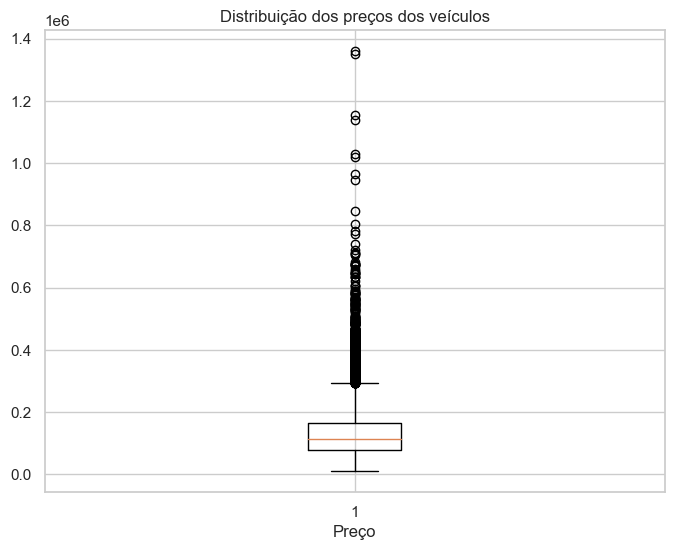

Mediana do preço: R$ 114355.79
Desvio padrão do preço: R$ 81662.87


In [14]:
# Análise estatística da variável "preco"
preco_stats = train_data['preco'].describe()

# Calculando a mediana
mediana_preco = train_data['preco'].median()

# Calculando o desvio padrão
desvio_padrao_preco = train_data['preco'].std()

# Visualização do Boxplot na orientação horizontal com eixo y em formato de número inteiro
plt.figure(figsize=(8, 6))
plt.boxplot(train_data['preco'])
plt.title('Distribuição dos preços dos veículos')
plt.xlabel('Preço')
plt.show()

# Exibindo as estatísticas descritivas sem notação científica
print(f"Mediana do preço: R$ {mediana_preco:.2f}")
print(f"Desvio padrão do preço: R$ {desvio_padrao_preco:.2f}")

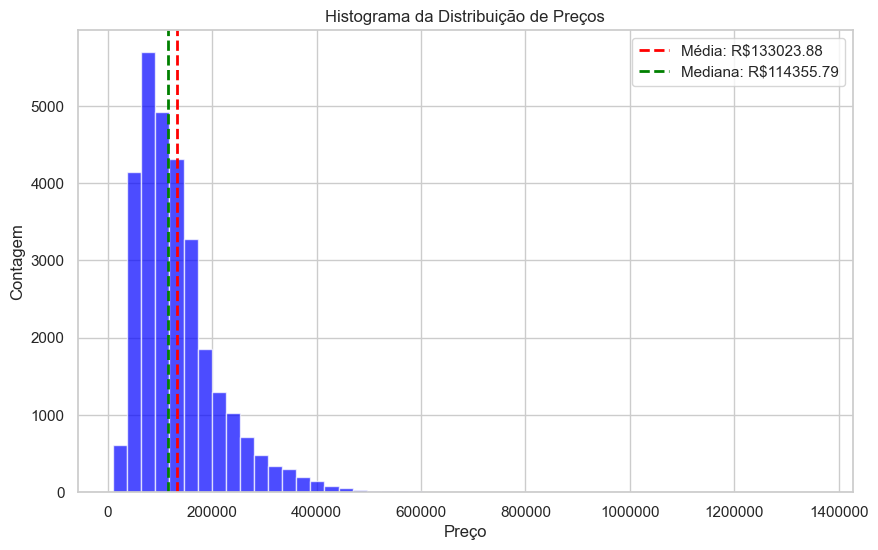

In [15]:
# Plot do histograma
plt.figure(figsize=(10, 6))
plt.hist(train_data['preco'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma da Distribuição de Preços')

# Calculando e formatando os valores da média e mediana para duas casas decimais
media = train_data['preco'].mean()
mediana = train_data['preco'].median()
media_label = f'Média: R${media:.2f}'
mediana_label = f'Mediana: R${mediana:.2f}'

# Adicionando as legendas da média e mediana
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=media_label)
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=mediana_label)

# Retirando a notação científica no eixo X (preço)
plt.ticklabel_format(axis='x', style='plain')  

# Plotando o gráfico
plt.legend()
plt.show()

A presença de outliers (valores extremos) nos preços dos veículos populares pode estar influenciando a média, puxando-a para cima. Os outliers podem ser preços excepcionalmente altos de alguns carros populares, que podem ser raros ou possuir características especiais. Enquanto a mediana não é tão afetada por outliers, a média pode ser distorcida por eles.

#### Hipótese 2: Carros sem garantia de fábrica são mais baratos.

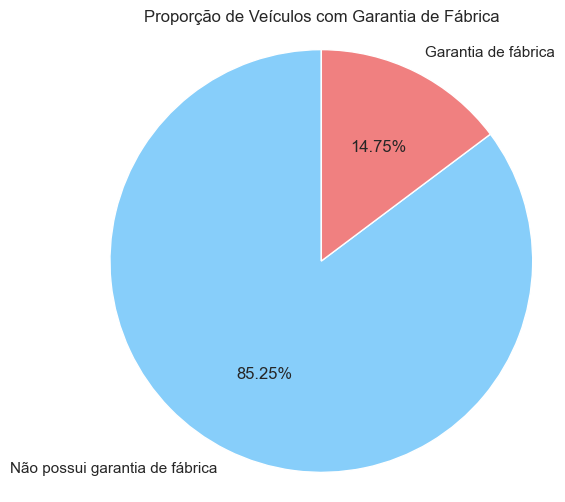

In [16]:
# Contagem de veículos com e sem garantia de fábrica
garantia_counts = train_data['garantia_de_fábrica'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(garantia_counts, labels=garantia_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightskyblue', 'lightcoral'])
plt.title('Proporção de Veículos com Garantia de Fábrica')
plt.axis('equal')
plt.show()

In [17]:
# Valor médio dos carros com garantia
valor_medio_com_garantia = train_data[train_data['garantia_de_fábrica'] == "Não possui garantia de fábrica"]['preco'].mean()

# Valor médio dos carros sem garantia
valor_medio_sem_garantia = train_data[train_data['garantia_de_fábrica'] == "Garantia de fábrica"]['preco'].mean()

# Mostrar os resultados
print(f"Valor médio dos carros com garantia: R${valor_medio_com_garantia:.2f}")
print(f"Valor médio dos carros sem garantia: R${valor_medio_sem_garantia:.2f}")

Valor médio dos carros com garantia: R$126798.18
Valor médio dos carros sem garantia: R$168993.14


Com base nos dados do dataset e no gráfico, é possível observar que a maioria dos carros não possui garantia de fábrica, mas o preço médio desses carros é maior do que os que possuem garantia, pode indicar que, apesar da ausência de garantia de fábrica, os carros sem garantia possuem outras características ou fatores que os tornam mais valorizados e, consequentemente, com preços mais altos. Alguns possíveis motivos para essa observação poderiam ser:

* Carros de Luxo ou Esportivos
* Carros de Edição Limitada ou Colecionador

#### Hipótese 3: A valorização do preço médio dos veículos ao longo dos anos está associada ao aumento da demanda por veículos mais novos

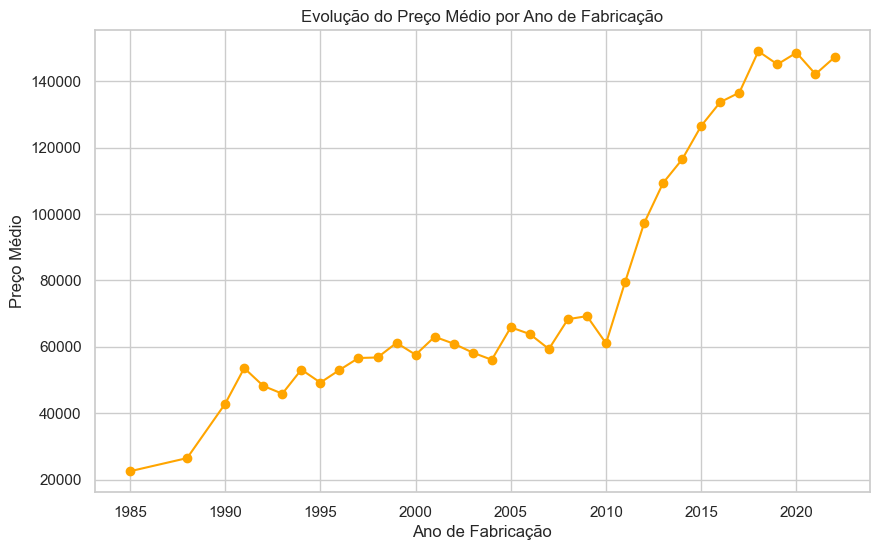

In [18]:
#Gráfico de Linha

plt.figure(figsize=(10, 6))
preco_medio_por_ano = train_data.groupby('ano_de_fabricacao')['preco'].mean()
plt.plot(preco_medio_por_ano.index, preco_medio_por_ano.values, marker='o', color='orange')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço Médio')
plt.title('Evolução do Preço Médio por Ano de Fabricação')
plt.grid(True)
plt.show()

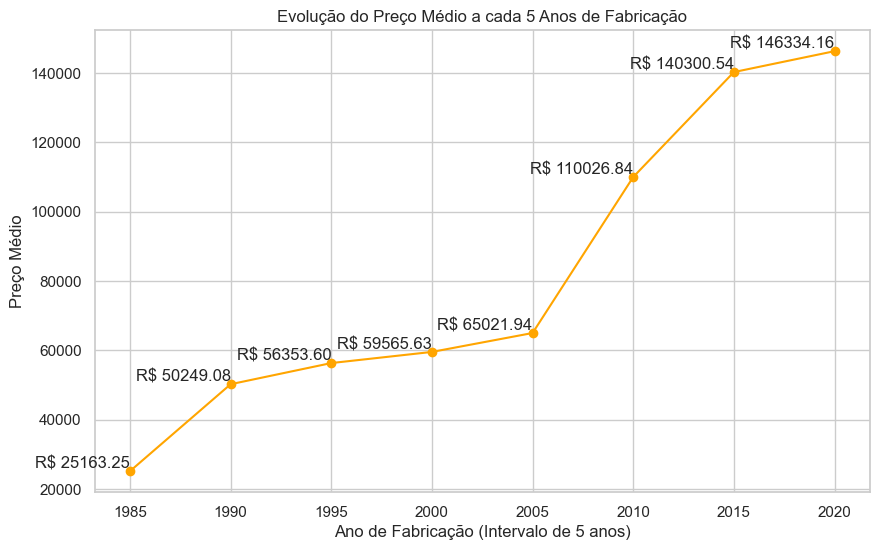

In [19]:
# Agrupar os dados por intervalos de 5 anos e calcular o preço médio
train_data['ano_de_fabricacao_intervalo'] = train_data['ano_de_fabricacao'] // 5 * 5
preco_medio_por_intervalo = train_data.groupby('ano_de_fabricacao_intervalo')['preco'].mean()

# Criando o gráfico de linha com o preço médio em cada intervalo de 5 anos
plt.figure(figsize=(10, 6))
plt.plot(preco_medio_por_intervalo.index, preco_medio_por_intervalo.values, marker='o', color='orange')
plt.xlabel('Ano de Fabricação (Intervalo de 5 anos)')
plt.ylabel('Preço Médio')
plt.title('Evolução do Preço Médio a cada 5 Anos de Fabricação')
plt.grid(True)

# Adicionando os valores do preço médio nos pontos
for x, y in zip(preco_medio_por_intervalo.index, preco_medio_por_intervalo.values):
    plt.text(x, y, f'R$ {y:.2f}', ha='right', va='bottom')

# Plot
plt.show()

 Observa-se que entre os anos de 2005 a 2010, o preço médio dos automóveis aumentou significativamente, chegando a mais que dobrar em relação aos anos anteriores. Essa variação expressiva pode ser influenciada pela presença de outliers, que são modelos mais novos ou edições especiais com preços excepcionalmente altos em comparação com os veículos comuns.

### Perguntas de Negócio

#### Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

In [25]:
# Contagem de cada marca
contagem_marcas = train_data['marca'].value_counts()

# Selecionando as marcas mais frequentes como sendo as marcas populares
marcas_populares = contagem_marcas.head(5).index.tolist()

# Filtrando os dados para incluir apenas carros das marcas populares
carros_populares = train_data[train_data['marca'].isin(marcas_populares)]

# Calculando a média de preços dos carros de marcas populares por estado
media_preco_por_estado = carros_populares.groupby('estado_vendedor')['preco'].mean().reset_index()


# Encontrando o índice do estado com o maior preço médio
indice_maior_preco = media_preco_por_estado['preco'].idxmax()

# Obtendo o nome do estado correspondente
estado_maior_preco = media_preco_por_estado.loc[indice_maior_preco, 'estado_vendedor']

preco_medio_maior_preco = media_preco_por_estado.loc[indice_maior_preco, 'preco']

# Obtendo a margem de lucro
margem_lucro_reais =  ((preco_medio_maior_preco - media)/preco_medio_maior_preco)*100

print(f"O estado com o maior preço médio dos carros das 5 marcas mais populares é: {estado_maior_preco}")
print(f"O preço médio dos carros nesse estado é: R$ {preco_medio_maior_preco:.2f}")
print(f"A margem média de lucro sob as vendas é de: {margem_lucro_reais:.2f}%")

O estado com o maior preço médio dos carros das 5 marcas mais populares é: Sergipe (SE)
O preço médio dos carros nesse estado é: R$ 201060.00
A margem média de lucro sob as vendas é de: 33.84%


#### Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?

In [26]:
# Filtrando os dados para incluir apenas carros que são picapes e têm transmissão automática
picapes_trans_auto = train_data[(train_data['tipo'] == 'Picape') & (train_data['cambio'] == 'Automática')]

# Calculando a média de preços das picapes com transmissão automática por estado
media_preco_por_estado = picapes_trans_auto.groupby('estado_vendedor')['preco'].mean().reset_index()

# Encontrando o índice do estado com o menor preço médio
indice_menor_preco = media_preco_por_estado['preco'].idxmin()

# Obtendo o nome do estado correspondente
estado_menor_preco = media_preco_por_estado.loc[indice_menor_preco, 'estado_vendedor']

# Calculando o preço médio das picapes com transmissão automática para o estado com menor preço médio
preco_medio_menor_preco = media_preco_por_estado.loc[indice_menor_preco, 'preco']

print(f"O estado com o menor preço médio das picapes com transmissão automática é: {estado_menor_preco}")
print(f"O preço médio das picapes com transmissão automática nesse estado é: R$ {preco_medio_menor_preco:.2f}")

O estado com o menor preço médio das picapes com transmissão automática é: Paraíba (PB)
O preço médio das picapes com transmissão automática nesse estado é: R$ 93157.04


#### Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

In [27]:
# Filtrando os dados para incluir apenas carros que possuam garantia de fábrica
carros_com_garantia = train_data[train_data['garantia_de_fábrica'] == 'Garantia de fábrica']

# Calculando a média de preços dos carros com garantia de fábrica por estado
media_preco_por_estado = carros_com_garantia.groupby('estado_vendedor')['preco'].mean().reset_index()

# Encontrando o índice do estado com o menor preço médio
indice_menor_preco = media_preco_por_estado['preco'].idxmin()

# Obteno o nome do estado correspondente
estado_menor_preco = media_preco_por_estado.loc[indice_menor_preco, 'estado_vendedor']

# Calculando o preço médio dos carros com garantia de fábrica para o estado com menor preço médio
preco_medio_menor_preco = media_preco_por_estado.loc[indice_menor_preco, 'preco']

print(f"O estado com o menor preço médio dos carros com garantia de fábrica é: {estado_menor_preco}")
print(f"O preço médio dos carros com garantia de fábrica nesse estado é: R$ {preco_medio_menor_preco:.2f}")

O estado com o menor preço médio dos carros com garantia de fábrica é: Paraíba (PB)
O preço médio dos carros com garantia de fábrica nesse estado é: R$ 95762.75


## Modelo Preditivo

O problema de prever o preço de um carro com base nas características fornecidas no dataset, nesse caso o mais indicado seria um modelo de regressão, pois o objetivo é estimar um valor contínuo, como uma variável numérica, utilizando um conjunto de variáveis independentes como entrada. Nesse dataset específico, a variável que desejamos prever é o preço do carro, que é uma variável numérica e contínua.

Através de algoritmos de regressão, nosso objetivo é criar um modelo capaz de mapear as características do carro para um valor numérico correspondente ao seu preço, permitindo realizar previsões sobre o preço de carros desconhecidos com base nos padrões identificados nos dados de treinamento.

Prós:

- Eficiência computacional;
- Interpretação dos coeficientes;
- Simplicidade

Contras: 

- Overfitting;
- Sensibilidade a Outliers;
- Suposições de erros

#### Quais variáveis e/ou suas transformações você utilizou e por quê?


O problema de prever o preço de um carro com base nas características fornecidas no dataset é um problema de regressão.

Em problemas de regressão, o objetivo é prever um valor contínuo, como uma variável numérica, a partir de um conjunto de variáveis independentes. No caso desse dataset, a variável alvo é o preço do carro, que é uma variável numérica e contínua.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

test_data = pd.read_csv('datasets/test_data.csv')
test_data.drop(columns=['veiculo_alienado'], inplace=True)

In [37]:
print(f"O dataframe possui {test_data.shape[0]} linhas e {test_data.shape[1]} colunas.")


O dataframe possui 9862 linhas e 27 colunas.


In [51]:
# Separando as variáveis preditoras (features) e a variável alvo (preco)
X = train_data.drop(columns=['preco'])
y = train_data['preco']


In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_train_encoded, y, test_size=0.25, random_state=42)

In [44]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((22188, 28), (7396, 28), (22188,), (7396,))

In [45]:
X_train

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,ano_de_fabricacao_intervalo
2879,232586289612364159048516814256700884159,8.00,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2019,2019,31573,Automática,4,Hatchback,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,2015
22218,9664188921742675774368346622755758814,8.00,FIAT,ARGO,1.3 FIREFLY FLEX TREKKING MANUAL,2020,2020,22907,Manual,4,Hatchback,N,Branco,PF,São Bernardo do Campo,São Paulo (SP),Pessoa Física,False,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,2020
11433,263430157559558612863796908000522248292,8.00,VOLKSWAGEN,T-CROSS,1.0 200 TSI TOTAL FLEX COMFORTLINE AUTOMÁTICO,2019,2019,66542,Manual,4,Sedã,N,Branco,PJ,Mesquita,Rio Grande do Sul (RS),Loja,True,True,False,Aceita troca,Único dono,Nem todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,2015
18266,55125302081111229859115056790551927762,8.00,VOLKSWAGEN,GOLF,2.0 TSI GTI 16V TURBO GASOLINA 4P AUTOMÁTICO,2017,2017,88223,Automática,4,Hatchback,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,Mais de um dono,Nem todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,2015
20096,195082983094937402357844259649522470793,8.00,TOYOTA,COROLLA,2.0 VVT-IE FLEX XEI DIRECT SHIFT,2020,2021,32486,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Não Licenciado,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,9970401356964341669563786944371690821,8.00,LAND ROVER,DISCOVERY SPORT,2.0 16V TD4 TURBO DIESEL SE 4P AUTOMÁTICO,2017,2018,75541,Automática,4,Sedã,N,Branco,PF,Porto Alegre,Rio Grande do Sul (RS),Pessoa Física,False,False,False,Aceita troca,Mais de um dono,Todas as revisões feitas pela concessionária,IPVA pago,Não Licenciado,Não possui garantia de fábrica,Todas as revisões feitas pela agenda do carro,2015
5390,170851601454473644910673357720050794474,8.00,MITSUBISHI,ASX,2.0 4X2 16V GASOLINA 4P AUTOMÁTICO,2015,2016,52761,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Não aceita troca,Mais de um dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,Nem todas as revisões feitas pela agenda do carro,2015
860,338560291081815208366760894054900201923,8.00,RENAULT,DUSTER,2.0 TECH ROAD II 4X2 16V FLEX 4P AUTOMÁTICO,2013,2014,99360,Automática,4,Sedã,N,Preto,PF,Guarulhos,São Paulo (SP),Pessoa Física,False,False,False,Não aceita troca,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,Todas as revisões feitas pela agenda do carro,2010
15795,65784629688549241909515301838909604995,8.00,JEEP,COMPASS,2.0 16V DIESEL TRAILHAWK 4X4 AUTOMÁTICO,2018,2018,38928,Automática,4,Utilitário esportivo,N,Preto,PF,Ribeirão Preto,São Paulo (SP),Pessoa Física,False,False,False,Não aceita troca,Mais de um dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,Todas as revisões feitas pela agenda do carro,2015


In [49]:
# Criando o modelo de Regressão Linear
model = LinearRegression()

In [50]:
# Treinando o modelo com os dados de treinamento
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'VOLKSWAGEN'

In [48]:
# Fazendo previsões no conjunto de validação
y_pred = model.predict(X_val)

# Avaliando o desempenho do modelo usando métricas de erro
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)

print("Métricas de Desempenho:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Removendo a mesma coluna "coluna_removida" do dataset de teste
test_data.drop(columns=['coluna_removida'], inplace=True)

# Fazendo previsões no dataset de teste
predictions = model.predict(test_data)

# Criando o dataframe com as previsões
predicted_df = pd.DataFrame({'id': test_data['id'], 'preco': predictions})

# Salvando as previsões em um arquivo CSV
predicted_df.to_csv('predicted.csv', index=False)

ValueError: could not convert string to float: 'VOLKSWAGEN'